In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
link = "https://docs.google.com/spreadsheets/d/1rFyU55Pu7nm9BZItX_qy-XF-gSfeSRgzejEchmZHnV4/export?format=csv"
df = pd.read_csv(link)

In [11]:
df[["Income", "Gender", "Department", "Team"]]

,Income,Gender,Department,Team
0,46000,F,Finance,A
1,39000,M,Finance,B
2,41000,M,Software,A
3,33000,M,Software,B
4,30000,F,HR,A
5,49000,M,Finance,B
6,41000,M,Finance,B
7,48000,M,Software,A
8,39000,M,Software,B
9,39000,M,HR,B


The possible features we may use for the decision tree are income, gender, department

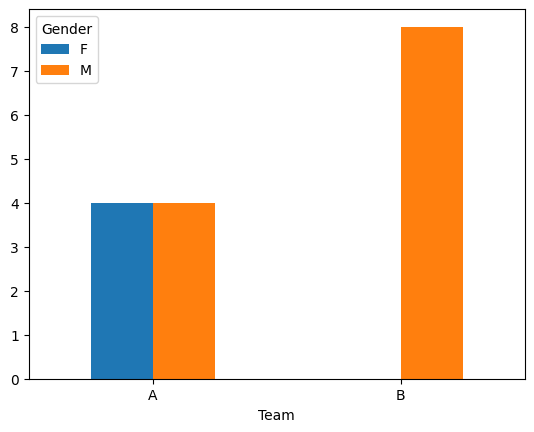

In [12]:
gender_counts = df.groupby(['Team', 'Gender']).size().unstack(fill_value=0)
gender_counts.plot(kind='bar', rot=0)
plt.savefig('fig1.png')
plt.show()

All the female employees are in team A!

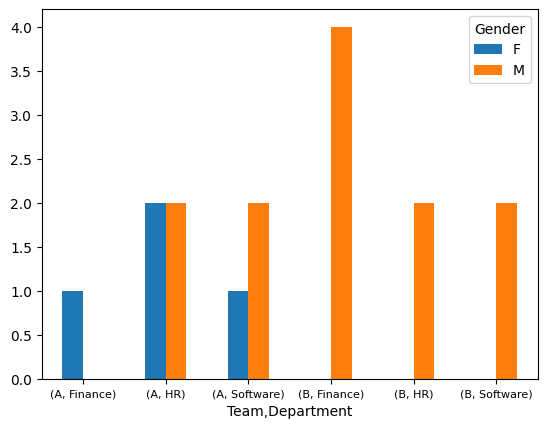

In [13]:
data = df.groupby(['Team', 'Department', 'Gender']).size().unstack(fill_value=0)
data.plot(kind='bar', rot=0)
plt.xticks(fontsize=8)
plt.savefig('fig2.png')
plt.show()

We can observe that gender=M and department=Finance implies team B \
Now we need to classify the remaining male employees.

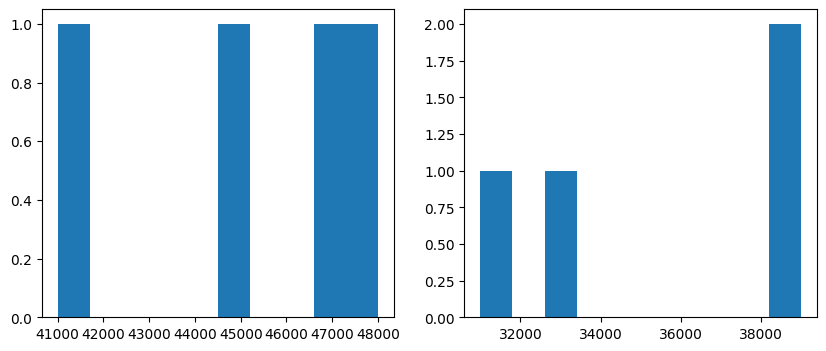

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
d = df[df["Gender"] == "M"]
d1 = d[d["Department"] != "Finance"]
axes[0].hist(d1[d1["Team"]=="A"]["Income"])
axes[1].hist(d1[d1["Team"]=="B"]["Income"])
plt.savefig('fig3.png')
plt.show()

We can see that out of our remaining employees those in team A are above 40000 income and in team B are below 40000 income.

# **Decision Tree**

In [15]:
def decisiontree(gender, department, income):
    if gender == "F":
        return 'A'
    elif gender == "M":
        if department == "Finance":
            return 'B'
        else:
            if income > 40000:
                return 'A'
            else:
                return 'B'

In [16]:
test = df[["Income", "Gender", "Department", "Team"]]
for i in range(len(test)):
    gender = test["Gender"][i]
    income = test["Income"][i]
    department = test["Department"][i]
    if decisiontree(gender, department, income) == test["Team"][i]:
        print("Correct")
    else:
        print("Incorrect")

Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct
Correct


In [17]:
decisiontree("F", "Finance", 45000)

'A'

In [18]:
decisiontree("M", "HR", 45000)

'A'